## **Differential Privacy**

Adult dataset


Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pip install diffprivlib          #installing the differential privacy library

In [ ]:
import diffprivlib.models as dfp

from sklearn.linear_model import LogisticRegression

In [ ]:
data1 = pd.read_csv(r'/content/adult.csv')
data1.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
data1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
 data1.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
X_train = np.loadtxt("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", 
                        usecols=(0, 4, 10, 11, 12), delimiter=", ")                                    #Loading data from a text file,using only numerical columns 

y_train = np.loadtxt("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
                        usecols=14, dtype=str, delimiter=", ")                                         #column "income" is the target 

In [ ]:
np.unique(y_train)

array(['<=50K', '>50K'], dtype='<U5')

In [ ]:
X_test = np.loadtxt("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",
                        usecols=(0, 4, 10, 11, 12), delimiter=", ", skiprows=1)

y_test = np.loadtxt("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",
                        usecols=14, dtype=str, delimiter=", ", skiprows=1)
# Must trim trailing period "." from label
y_test = np.array([a[:-1] for a in y_test])

In [ ]:
np.unique(y_test)

array(['<=50K', '>50K'], dtype='<U5')

Normal Logistic Model

In [ ]:
Lmodel = LogisticRegression(solver="lbfgs")  
Lmodel.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# from sklearn.metrics import accuracy_score
Laccuracy = Lmodel.score(X_test, y_test)                     #multiclass problem
print("Accuracy without privacy: %.2f%%" % (Laccuracy * 100))

Accuracy without privacy: 81.25%


Using Differentially private logistic regression

In [ ]:
dfp_clf = dfp.LogisticRegression()         #importing privacy enabled logregression model from differential library
dfp_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)


LogisticRegression(accountant=BudgetAccountant(spent_budget=[(1.0, 0)]),
                   data_norm=99999.04562544584)

In [ ]:
print("Accuracy for Differentially private model(epsilon=%.2f): %.2f%%" % 
     (dfp_clf.epsilon, dfp_clf.score(X_test, y_test) * 100))

Accuracy for Differentially private model(epsilon=1.00): 52.69%


In [ ]:
dfp_clf = dfp.LogisticRegression(epsilon=float("inf"), data_norm=1e5)
dfp_clf.fit(X_train, y_train)

LogisticRegression(accountant=BudgetAccountant(spent_budget=[(1.0, 0), (inf, 0)]),
                   data_norm=100000.0, epsilon=inf)

In [ ]:
print("Differentially private test accuracy (epsilon=%.2f): %.2f%%" % 
     (dfp_clf.epsilon, dfp_clf.score(X_test, y_test) * 100))

Differentially private test accuracy (epsilon=inf): 81.25%


Visualising Accuacy

In [ ]:
accuracy = []
epsilons = np.logspace(-3, 1, 500)

for eps in epsilons:
    dfp_clf = dfp.LogisticRegression(epsilon=eps, data_norm=100)
    dfp_clf.fit(X_train, y_train)
    accuracy.append(dfp_clf.score(X_test, y_test))

In [ ]:
import pickle
                                                                                    #saving the results using pickle so we can reproduce the plot in future.
pickle.dump((epsilons,Laccuracy , accuracy), open("lr_accuracy_500.p", "wb" ) )

In [ ]:
epsilons, Laccuracy, accuracy = pickle.load(open("lr_accuracy_500.p", "rb"))

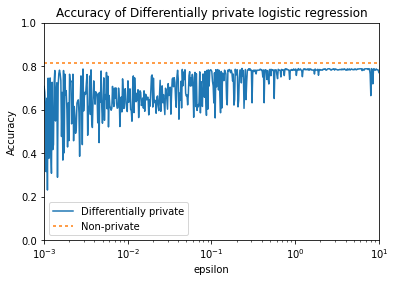

In [ ]:
plt.semilogx(epsilons, accuracy, label="Differentially private")
plt.plot(epsilons, np.ones_like(epsilons) * Laccuracy, dashes=[2,2], label="Non-private")
plt.title("Accuracy of Differentially private logistic regression")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xlim(epsilons[0], epsilons[-1])
plt.legend(loc=3)
plt.show()

Diabetics dataset

# Linear Regression

In [ ]:
from sklearn import datasets

dataset = datasets.load_diabetes()

In [ ]:
print(dataset)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.data[:, :2], dataset.target, test_size=0.2)
print("Train examples: %d, Test examples: %d" % (X_train.shape[0], X_test.shape[0]))                          #using only 2 featuresmfrom the datatset

Train examples: 120, Test examples: 30


Without Privacy

In [ ]:
from sklearn.linear_model import LinearRegression as sk_LinearRegression

Lregr = sk_LinearRegression()
Lregr.fit(X_train, y_train)
Lrscore = Lregr.score(X_test, y_test)
print("R2 score of non privacy enabled model: %.2f" % Lrscore)

R2 score of non privacy enabled model: 0.05


privacy enabled Linear Regression


In [ ]:
from diffprivlib.models import LinearRegression

Dregr = LinearRegression()
Dregr.fit(X_train, y_train)

print("R2 score for epsilon=%.2f: %.2f" % (Dregr.epsilon, Dregr.score(X_test, y_test)))

R2 score for epsilon=1.00: 0.04


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/linear_regression.py:258: PrivacyLeakWarning: Bounds parameters haven't been specified, so falling back to determining bounds from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `bounds_X` and `bounds_y`.
  PrivacyLeakWarning)


Visualising scores

In [ ]:
epsilons = np.logspace(-1, 2, 100)
accuracy = []

for epsilon in epsilons:
    Dregr = LinearRegression(epsilon=epsilon, bounds_X=(-0.138, 0.2), bounds_y=(25, 346))
    Dregr.fit(X_train, y_train)
    
    accuracy.append(Dregr.score(X_test, y_test))

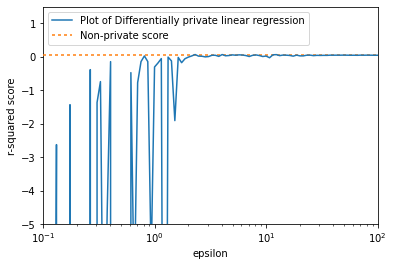

In [ ]:
plt.semilogx(epsilons, accuracy, label="Plot of Differentially private linear regression", zorder=10)
plt.semilogx(epsilons,Lrscore  * np.ones_like(epsilons), dashes=[2,2], label="Non-private score", zorder=5)
plt.xlabel("epsilon")
plt.ylabel("r-squared score")
plt.ylim(-5, 1.5)
plt.xlim(epsilons[0], epsilons[-1])
plt.legend(loc=2)

Iris dataset


# **Naive Bayes**

In [ ]:
data3 = pd.read_csv(r'/content/Iris.csv')
data3.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB
GModel = GaussianNB()
GModel.fit(X_train, y_train)

GaussianNB()

In [ ]:
print("Accuracy of non privacy enabled Gaussian Model: %.2f%%" % 
     (GModel.score(X_test, y_test) * 100))

Accuracy of non privacy enabled Gaussian Model: 93.33%


Privacy enabled Gaussian

In [ ]:
from diffprivlib.models import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/diffprivlib/models/naive_bayes.py:101: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  "privacy leakage, specify bounds for each dimension.", PrivacyLeakWarning)


GaussianNB(accountant=BudgetAccountant(spent_budget=[(1.0, 0), (0.001, 0), (0.0010186289902446876, 0), (0.0010376050197669117, 0), (0.0010569345535579883, 0), ...]),
           bounds=(array([4.4, 2. , 1. , 0.1]), array([7.7, 4.4, 6.7, 2.5])))

In [ ]:
clf.predict(X_test)

array([2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 1, 0, 1, 0,
       1, 2, 1, 2, 1, 2, 1, 1])

In [ ]:
print("Accuracy of Gaussian model: %f" % clf.score(X_test, y_test))

Accuracy of Gaussian model: 0.966667


Visualising Accuracy

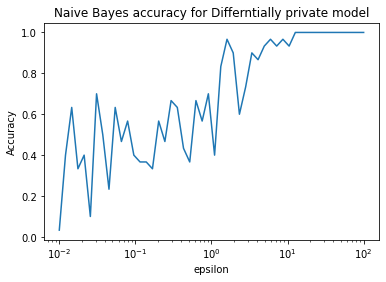

In [ ]:
epsilons = np.logspace(-2, 2, 50)
bounds = ([4.3, 2.0, 1.1, 0.1], [7.9, 4.4, 6.9, 2.5])
accuracy = list()

for epsilon in epsilons:
    clf = GaussianNB(bounds=bounds, epsilon=epsilon)
    clf.fit(X_train, y_train)
    
    accuracy.append(clf.score(X_test, y_test))

plt.semilogx(epsilons, accuracy)
plt.title("Naive Bayes accuracy for Differntially private model")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.show()

# Machine Learning Anonymization

Using Adult dataset

Installing required libraries

In [ ]:
pip install ai-privacy-toolkit                   #apt - toolkit containing anonymisation and minimisation models

In [ ]:
pip install adversarial-robustness-toolbox       #art - Python library used to evaluate Machine Learning models and applications against the adversarial threats of Evasion, Poisoning, Extraction, and Inference

In [ ]:
data1.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [ ]:

x_train = np.loadtxt("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",  # Use only numeric features (age, education-num, capital-gain, capital-loss, hours-per-week)
                        usecols=(0, 4, 10, 11, 12), delimiter=", ")

y_train = np.loadtxt("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
                        usecols=14, dtype=str, delimiter=", ")


In [ ]:
x_test = np.loadtxt("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",
                        usecols=(0, 4, 10, 11, 12), delimiter=", ", skiprows=1)

y_test = np.loadtxt("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",
                        usecols=14, dtype=str, delimiter=", ", skiprows=1)

In [ ]:
y_test = np.array([a[:-1] for a in y_test])  # Trim trailing period "." from label


In [ ]:
data1['income'].head()

0    <=50K
1    <=50K
2     >50K
3     >50K
4    <=50K
Name: income, dtype: object

In [ ]:
y_train[y_train == '<=50K'] = 0
y_train[y_train == '>50K'] = 1
y_train = y_train.astype(np.int)

y_test[y_test == '<=50K'] = 0
y_test[y_test == '>50K'] = 1
y_test = y_test.astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review yo

In [ ]:
x_train = x_train[:x_test.shape[0]]      #balanced dataset
y_train = y_train[:y_test.shape[0]]

print(x_train)

[[  39.   13. 2174.    0.   40.]
 [  50.   13.    0.    0.   13.]
 [  38.    9.    0.    0.   40.]
 ...
 [  27.   13.    0.    0.   40.]
 [  26.   11.    0.    0.   48.]
 [  27.    9.    0.    0.   40.]]


Decision Tree Without anonymization

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

print('Accuracy of Model without anonymization: ', model.score(x_test, y_test))

Accuracy of Model without anonymization:  0.8076285240464345


In [ ]:
from art.estimators.classification.scikitlearn import ScikitlearnDecisionTreeClassifier
art_classifier = ScikitlearnDecisionTreeClassifier(model)
x_train_predictions = np.array([np.argmax(arr) for arr in art_classifier.predict(x_train)]).reshape(-1,1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


Inference attack on the non anonymized model

In [ ]:
from art.attacks.inference.membership_inference import MembershipInferenceBlackBox


bb_attack = MembershipInferenceBlackBox(art_classifier, attack_model_type='rf')   ## attack_model_type can be nn (neural network), rf (randon forest) or gb (gradient boosting)


attack_train_ratio = 0.5
attack_train_size = int(len(x_train) * attack_train_ratio)
attack_test_size = int(len(x_test) * attack_train_ratio)


In [ ]:
# train attack model
bb_attack.fit(x_train[:attack_train_size], y_train[:attack_train_size],
              x_test[:attack_test_size], y_test[:attack_test_size])

In [ ]:
# get inferred values for remaining half
inferred_train_bb = bb_attack.infer(x_train[attack_train_size:], y_train[attack_train_size:])
inferred_test_bb = bb_attack.infer(x_test[attack_test_size:], y_test[attack_test_size:])


In [ ]:
# checking accuracy
train_acc = np.sum(inferred_train_bb) / len(inferred_train_bb)
test_acc = 1 - (np.sum(inferred_test_bb) / len(inferred_test_bb))
acc = (train_acc * len(inferred_train_bb) + test_acc * len(inferred_test_bb)) / (len(inferred_train_bb) + len(inferred_test_bb))
print(acc)

0.5443434467510134


Attack on Anonymised data

In [ ]:
from apt.utils.datasets import ArrayDataset
# import os
# import sys
# sys.path.insert(0, os.path.abspath('..'))
from apt.anonymization import Anonymize              #importing Anonymize module from Apt library

                                                     #quasiidentifers are age,education-num,capital gain, hours-per-week
QI = [0, 1, 2, 4]
anonymizer = Anonymize(100, QI)                      # k value is 100 means- each record in the anonymized dataset is identical to 99 others on the quasi-identifier values
anon = anonymizer.anonymize(ArrayDataset(x_train, x_train_predictions))
print(anon)

[[38. 13.  0.  0. 40.]
 [46. 13.  0.  0. 35.]
 [28.  9.  0.  0. 40.]
 ...
 [26. 13.  0.  0. 40.]
 [27. 10.  0.  0. 50.]
 [28.  9.  0.  0. 40.]]


In [ ]:
# number of distinct rows in original data
len(np.unique(x_train, axis=0))

6739

After anonymization

In [ ]:
# number of distinct rows in anonymized data
len(np.unique(anon, axis=0))

401

Decision Tree on Anonymized data

In [ ]:
anon_model = DecisionTreeClassifier()
anon_model.fit(anon, y_train)

anon_art_classifier = ScikitlearnDecisionTreeClassifier(anon_model)

print('Accuracy of Anonymized model: ', anon_model.score(x_test, y_test))

Accuracy of Anonymized model:  0.8310914562987531


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


Attacking Anonymized model

In [ ]:
anon_bb_attack = MembershipInferenceBlackBox(anon_art_classifier, attack_model_type='rf')

# train attack model
anon_bb_attack.fit(x_train[:attack_train_size], y_train[:attack_train_size],
                   x_test[:attack_test_size], y_test[:attack_test_size])

# get inferred values
anon_inferred_train_bb = anon_bb_attack.infer(x_train[attack_train_size:], y_train[attack_train_size:])
anon_inferred_test_bb = anon_bb_attack.infer(x_test[attack_test_size:], y_test[attack_test_size:])
# check accuracy
anon_train_acc = np.sum(anon_inferred_train_bb) / len(anon_inferred_train_bb)
anon_test_acc = 1 - (np.sum(anon_inferred_test_bb) / len(anon_inferred_test_bb))
anon_acc = (anon_train_acc * len(anon_inferred_train_bb) + anon_test_acc * len(anon_inferred_test_bb)) / (len(anon_inferred_train_bb) + len(anon_inferred_test_bb))
print(anon_acc)

0.4992629898046923


Accuracy reduced to 50%

# **Machine Learning Minimization**

Diabetics dataset from sklearn library







In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

dataset = load_diabetes()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.5, random_state=14)

labels = ['age', 'sex', 'bmi', 'bp',
                's1', 's2', 's3', 's4', 's5', 's6']
QI = ['age', 'bmi', 's2', 's5', 's6']                 #quasi identifiers -labels which are going to minimise

In [ ]:
from apt.minimization import GeneralizeToRepresentative         #importing generalization module
from sklearn.tree import DecisionTreeRegressor

Dmodel = DecisionTreeRegressor(random_state=10, min_samples_split=2)
Dmodel.fit(X_train, y_train)
print('Accuracy of non minimized model (R2 score): ', Dmodel.score(X_test, y_test))

Accuracy of non minimized model (R2 score):  0.15014421352446072


In [ ]:

minimizer1 = GeneralizeToRepresentative(Dmodel, target_accuracy=0.7, is_regression=True, 
                                    features_to_minimize=QI)                          #Minimizer can be fit on training or test data,doing it on test data will get better target accuracy
                                                            
X_generalizer_train1, x_test1, y_generalizer_train1, y_test1 = train_test_split(X_test, y_test,
                                                                test_size = 0.4, random_state = 38)

x_train_predictions1 = Dmodel.predict(X_generalizer_train1)
minimizer1.fit(X_generalizer_train1, x_train_predictions1, features_names=features)
transformed1 = minimizer1.transform(x_test1, features_names=features)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Initial accuracy of model on generalized data, relative to original model predictions (base generalization derived from tree, before improvements): 0.108922
Improving accuracy
feature to remove: s5
Removed feature: s5, new relative accuracy: 0.505498
feature to remove: s6
Removed feature: s6, new relative accuracy: 0.404757
feature to remove: bmi
Removed feature: bmi, new relative accuracy: 0.718978


In [ ]:
print('Accuracy on minimized data: ', Dmodel.score(transformed1, y_test1))
print('generalizations: ',minimizer1.generalizations_)

Accuracy on minimized data:  0.11604533946025941
generalizations:  {'ranges': {'age': [-0.07090024650096893, -0.043656209483742714, -0.041839939542114735, -0.03639113181270659, -0.01459590089507401, -0.012779632292222232, -0.009147093165665865, -0.0036982858437113464, 0.03989217430353165, 0.039892176166176796, 0.05623859912157059, 0.06713621318340302], 's2': [-0.0550188384950161, -0.0285577941685915, -0.024643437936902046, -0.02135537937283516, -0.013683241792023182, -0.006480826530605555, 0.009176596067845821, 0.023111702874302864, 0.02420772146433592, 0.02655633445829153, 0.039082273840904236]}, 'categories': {}, 'untouched': ['s5', 'sex', 's3', 'bmi', 's6', 's1', 'bp', 's4']}


Linear Regression 

Without Minimzation

In [ ]:
from sklearn.linear_model import LinearRegression
LRmodel = LinearRegression()
LRmodel.fit(X_train, y_train)
print('Accuracy of model without minimization(R2 score): ', LRmodel.score(X_test, y_test))

Accuracy of model without minimization(R2 score):  0.5080618258593723


In [ ]:
minimizer2 = GeneralizeToRepresentative(LRmodel, target_accuracy=0.7, is_regression=True,
                                    features_to_minimize=QI)


X_generalizer_train2, x_test2, y_generalizer_train2, y_test2 = train_test_split(X_test, y_test,
                                                                test_size = 0.4, random_state = 38)

x_train_predictions2 = LRmodel.predict(X_generalizer_train2)
minimizer2.fit(X_generalizer_train2, x_train_predictions2, features_names=features)
transformed2 = minimizer2.transform(x_test2, features_names=features)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Initial accuracy of model on generalized data, relative to original model predictions (base generalization derived from tree, before improvements): 0.358729
Improving accuracy
feature to remove: s2
Removed feature: s2, new relative accuracy: 0.774306


In [ ]:
print('Accuracy on minimized data: ', LRmodel.score(transformed2, y_test2))
print('generalizations: ',minimizer2.generalizations_)

Accuracy on minimized data:  0.39288131945725147
generalizations:  {'ranges': {'age': [-0.06181889958679676, -0.027309785597026348, -0.012779631884768605, -0.0036982858437113464, -0.001882016658782959, 0.0035667913034558296, 0.009015598800033331, 0.01991321425884962, 0.021729483967646956, 0.04534098319709301, 0.05805486813187599], 'bmi': [-0.0660245232284069, -0.06171327643096447, -0.048779530450701714, -0.036923596635460854, -0.022912041284143925, -0.015906263142824173, -0.009978296235203743, 0.007266696775332093, 0.022356065921485424, 0.028822937980294228, 0.04499012045562267, 0.04876246117055416, 0.053073709830641747, 0.10103634744882584], 's5': [-0.08940735459327698, -0.07823517918586731, -0.07310866191983223, -0.07022909820079803, -0.06740894541144371, -0.06558558344841003, -0.041897499933838844, -0.03781316243112087, -0.033939776942133904, -0.03263746201992035, -0.02538660168647766, -0.023219254799187183, -0.017585186287760735, -0.016525186598300934, -0.008522996446117759, -0.004